## Section 1: Setup and Imports

Importing all necessary libraries for data manipulation, statistical testing, and visualization.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 2.0.2


## Section 2: Data Loading

Loading the Telco Customer Churn dataset and displaying basic information about its structure, columns, and data types.

In [2]:
# Load the dataset
df = pd.read_csv('Telco_Customer_Churn.csv')

# Display basic information
print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

# Display all column names and data types
print("\n" + "="*50)
print("COLUMN INFORMATION:")
print("="*50)
print(df.dtypes)

# Display first few rows
print("\n" + "="*50)
print("FIRST 5 ROWS:")
print("="*50)
print(df.head())

# Display basic statistics for numeric columns
print("\n" + "="*50)
print("NUMERIC COLUMN STATISTICS:")
print("="*50)
print(df.describe())

# Display info summary
print("\n" + "="*50)
print("DATASET INFO:")
print("="*50)
df.info()

Dataset loaded successfully!

Dataset shape: (7043, 21)
Rows: 7043
Columns: 21

COLUMN INFORMATION:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

FIRST 5 ROWS:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      N

## Section 3: Initial Data Exploration (Contract and Churn)

**Objective:** Examine the two variables central to our research question—Contract type and Churn status—to understand their distributions and verify data quality.

**Exploration Plan:**
1. Check Contract type distribution: counts, percentages, and unique values
2. Check Churn status distribution: counts, percentages, and unique values  
3. Verify no missing values in either variable
4. Preview the relationship with a quick cross-tabulation

**Why this matters:** We need clean, complete data before statistical testing. This quick check confirms our variables are ready for analysis and gives us a first look at whether contract type and churn appear related.

In [16]:
# Explore Contract column
print("="*50)
print("CONTRACT TYPE DISTRIBUTION:")
print("="*50)
print("\nValue counts:")
print(df['Contract'].value_counts())
print("\nPercentages:")
print(df['Contract'].value_counts(normalize=True) * 100)
print(f"\nUnique values: {df['Contract'].unique()}")
print(f"Missing values: {df['Contract'].isnull().sum()}")

print("\n" + "="*50)
print("CHURN DISTRIBUTION:")
print("="*50)
print("\nValue counts:")
print(df['Churn'].value_counts())
print("\nPercentages:")
print(df['Churn'].value_counts(normalize=True) * 100)
print(f"\nUnique values: {df['Churn'].unique()}")
print(f"Missing values: {df['Churn'].isnull().sum()}")

# Quick look at the relationship
print("\n" + "="*50)
print("CHURN BY CONTRACT TYPE (PREVIEW):")
print("="*50)
preview = pd.crosstab(df['Contract'], df['Churn'])
print(preview)

CONTRACT TYPE DISTRIBUTION:

Value counts:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Percentages:
Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64

Unique values: ['Month-to-month' 'One year' 'Two year']
Missing values: 0

CHURN DISTRIBUTION:

Value counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentages:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Unique values: ['No' 'Yes']
Missing values: 0

CHURN BY CONTRACT TYPE (PREVIEW):
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


## Section 4: Create Analysis Dataframe

Creating a simplified dataframe containing only the two columns needed for analysis (Contract and Churn), verifying data quality, and saving the focused dataset for documentation purposes.

In [15]:
# Create dataframe with only the columns we need
df_analysis = df[['Contract', 'Churn']].copy()

print("Analysis dataframe created!")
print(f"\nShape: {df_analysis.shape}")
print(f"\nColumns: {df_analysis.columns.tolist()}")
print(f"\nFirst 10 rows:")
print(df_analysis.head(10))

# Verify no missing data
print(f"\nMissing values:")
print(df_analysis.isnull().sum())

# Save this simplified dataset for records
df_analysis.to_csv('churn_contract_analysis.csv', index=False)
print("\nSimplified dataset saved as 'churn_contract_analysis.csv'")

Analysis dataframe created!

Shape: (7043, 2)

Columns: ['Contract', 'Churn']

First 10 rows:
         Contract Churn
0  Month-to-month    No
1        One year    No
2  Month-to-month   Yes
3        One year    No
4  Month-to-month   Yes
5  Month-to-month   Yes
6  Month-to-month    No
7  Month-to-month    No
8  Month-to-month   Yes
9        One year    No

Missing values:
Contract    0
Churn       0
dtype: int64

Simplified dataset saved as 'churn_contract_analysis.csv'


## Section 5: Exploratory Analysis

**Objective:** Understand the relationship between contract type and churn before formal statistical testing.

**Analysis Plan:**
1. Build a contingency table (Contract Type × Churn Status) to see raw customer counts
2. Calculate churn rates as percentages for each contract type
3. Create a detailed summary showing total customers, churned customers, retained customers, and churn rate for each contract category
4. Calculate the overall churn rate as a baseline for comparison
5. Measure how much each contract type deviates from the overall average

**Why this matters:** This exploratory work reveals the pattern we'll be testing statistically. If we see large differences in churn rates across contract types here, the chi-square test will determine if those differences are statistically significant or just random variation.

In [5]:
# Create contingency table (raw counts)
print("="*60)
print("CONTINGENCY TABLE (Raw Counts):")
print("="*60)
contingency_table = pd.crosstab(df_analysis['Contract'], df_analysis['Churn'])
print(contingency_table)

# Calculate churn rates by contract type
print("\n" + "="*60)
print("CHURN RATES BY CONTRACT TYPE (%):")
print("="*60)
churn_rates = pd.crosstab(df_analysis['Contract'], df_analysis['Churn'], normalize='index') * 100
print(churn_rates.round(2))

# Create detailed summary
print("\n" + "="*60)
print("DETAILED SUMMARY BY CONTRACT TYPE:")
print("="*60)
summary = df_analysis.groupby('Contract')['Churn'].agg([
    ('Total_Customers', 'count'),
    ('Churned', lambda x: (x == 'Yes').sum()),
    ('Retained', lambda x: (x == 'No').sum()),
    ('Churn_Rate_%', lambda x: (x == 'Yes').mean() * 100)
]).round(2)
print(summary)

# Calculate overall churn rate for comparison
overall_churn_rate = (df_analysis['Churn'] == 'Yes').mean() * 100
print("\n" + "="*60)
print(f"Overall Churn Rate: {overall_churn_rate:.2f}%")
print("="*60)

# Show the differences
print("\n" + "="*60)
print("CHURN RATE DIFFERENCES FROM OVERALL AVERAGE:")
print("="*60)
for contract_type in summary.index:
    diff = summary.loc[contract_type, 'Churn_Rate_%'] - overall_churn_rate
    print(f"{contract_type}: {diff:+.2f} percentage points")

CONTINGENCY TABLE (Raw Counts):
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

CHURN RATES BY CONTRACT TYPE (%):
Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83

DETAILED SUMMARY BY CONTRACT TYPE:
                Total_Customers  Churned  Retained  Churn_Rate_%
Contract                                                        
Month-to-month             3875     1655      2220         42.71
One year                   1473      166      1307         11.27
Two year                   1695       48      1647          2.83

Overall Churn Rate: 26.54%

CHURN RATE DIFFERENCES FROM OVERALL AVERAGE:
Month-to-month: +16.17 percentage points
One year: -15.27 percentage points
Two year: -23.71 percentage points


## Section 6: Chi-Square Hypothesis Test

**Objective:** Determine whether contract type and churn status are statistically independent or associated.

**Hypotheses:**
- **H₀ (Null):** Contract type and churn status are independent. The proportion of customers who churn is equal across all contract types.
- **H₁ (Alternative):** Contract type and churn status are associated. Different contract types have significantly different churn rates.

**Analysis Plan:**
1. State our hypotheses and significance level (α = 0.05)
2. Perform chi-square test of independence using scipy.stats.chi2_contingency
3. Extract test results: chi-square statistic (χ²), p-value, and degrees of freedom
4. Review expected frequencies to verify test assumptions are met (all cells ≥ 5)
5. Calculate Cramér's V to measure effect size (strength of relationship)
6. Make statistical decision by comparing p-value to α
7. Interpret results in business context

**Why this matters:** The chi-square test provides rigorous statistical evidence about whether the churn differences we observed in Section 5 are real patterns or could have occurred by random chance. The p-value tells us if the relationship is statistically significant, while Cramér's V tells us if it's practically meaningful.

In [12]:
# State the hypotheses
print("="*60)
print("HYPOTHESIS TEST")
print("="*60)
print("H₀ (Null Hypothesis):")
print("  Contract type has no effect on churn rates.")
print("  The proportion of customers who churn is equal across")
print("  all contract types.")
print()
print("H₁ (Alternative Hypothesis):")
print("  Contract type significantly affects churn rates.")
print("  Customers on different contract types have different")
print("  churn rates.")
print()
print("Significance Level: α = 0.05")
print("="*60)

# Perform chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Display results
print("\n" + "="*60)
print("CHI-SQUARE TEST RESULTS:")
print("="*60)
print(f"Chi-square statistic (χ²): {chi2_stat:.4f}")
print(f"p-value: {p_value:.10f}")
print(f"Degrees of freedom: {dof}")

# Show expected frequencies
print("\n" + "="*60)
print("EXPECTED FREQUENCIES (if H₀ were true):")
print("="*60)
expected_df = pd.DataFrame(
    expected_freq,
    index=contingency_table.index,
    columns=contingency_table.columns
)
print(expected_df.round(2))

# Calculate Cramér's V (effect size)
print("\n" + "="*60)
print("EFFECT SIZE:")
print("="*60)
n = contingency_table.sum().sum()  # Total sample size
min_dim = min(contingency_table.shape[0] - 1, contingency_table.shape[1] - 1)
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

print(f"Cramér's V: {cramers_v:.4f}")
print()
# Interpret effect size
if cramers_v < 0.1:
    effect_interpretation = "Negligible effect"
elif cramers_v < 0.3:
    effect_interpretation = "Small effect"
elif cramers_v < 0.5:
    effect_interpretation = "Moderate effect"
else:
    effect_interpretation = "Large effect"
    
print(f"Interpretation: {effect_interpretation}")

# Make statistical decision
print("\n" + "="*60)
print("STATISTICAL DECISION:")
print("="*60)
alpha = 0.05

if p_value < alpha:
    print(f"✓ p-value ({p_value:.10f}) < α ({alpha})")
    print()
    print("Decision: REJECT the null hypothesis")
    print()
    print("Conclusion:")
    print("  There is statistically significant evidence that contract")
    print("  type affects customer churn rates. The observed differences")
    print("  in churn rates across contract types are unlikely to have")
    print("  occurred by random chance alone.")
else:
    print(f"✗ p-value ({p_value:.10f}) ≥ α ({alpha})")
    print()
    print("Decision: FAIL TO REJECT the null hypothesis")
    print()
    print("Conclusion:")
    print("  There is insufficient statistical evidence that contract")
    print("  type affects customer churn rates.")

print("="*60)

HYPOTHESIS TEST
H₀ (Null Hypothesis):
  Contract type has no effect on churn rates.
  The proportion of customers who churn is equal across
  all contract types.

H₁ (Alternative Hypothesis):
  Contract type significantly affects churn rates.
  Customers on different contract types have different
  churn rates.

Significance Level: α = 0.05

CHI-SQUARE TEST RESULTS:
Chi-square statistic (χ²): 1184.5966
p-value: 0.0000000000
Degrees of freedom: 2

EXPECTED FREQUENCIES (if H₀ were true):
Churn                No      Yes
Contract                        
Month-to-month  2846.69  1028.31
One year        1082.11   390.89
Two year        1245.20   449.80

EFFECT SIZE:
Cramér's V: 0.4101

Interpretation: Moderate effect

STATISTICAL DECISION:
✓ p-value (0.0000000000) < α (0.05)

Decision: REJECT the null hypothesis

Conclusion:
  There is statistically significant evidence that contract
  type affects customer churn rates. The observed differences
  in churn rates across contract types are unl

## Section 7: Visualization 1 - Churn Rate Bar Chart

**Objective:** Create a clear visual representation of churn rates across contract types to communicate findings to stakeholders.

**Visualization Plan:**
1. Extract churn rates (% who churned) for each contract type from our exploratory analysis
2. Create a bar chart with contract types on x-axis and churn rate percentage on y-axis
3. Use distinct colors for each contract type to improve readability
4. Add percentage labels on top of each bar for precise values
5. Include a horizontal dashed line showing the overall average churn rate (26.54%) as a reference point
6. Format with clear axis labels, title, and legend

**Why this matters:** While statistical tests provide evidence of significance, visualizations make the magnitude of differences immediately clear to non-technical stakeholders. This bar chart shows at a glance that month-to-month contracts have dramatically higher churn (42.71%) compared to one-year (11.27%) and two-year (2.83%) contracts, making the business case for contract-focused retention strategies obvious.

**Expected Output:** A professional bar chart saved as a high-resolution PNG file for inclusion in reports and presentations.

Bar chart saved as 'churn_rate_by_contract.png'


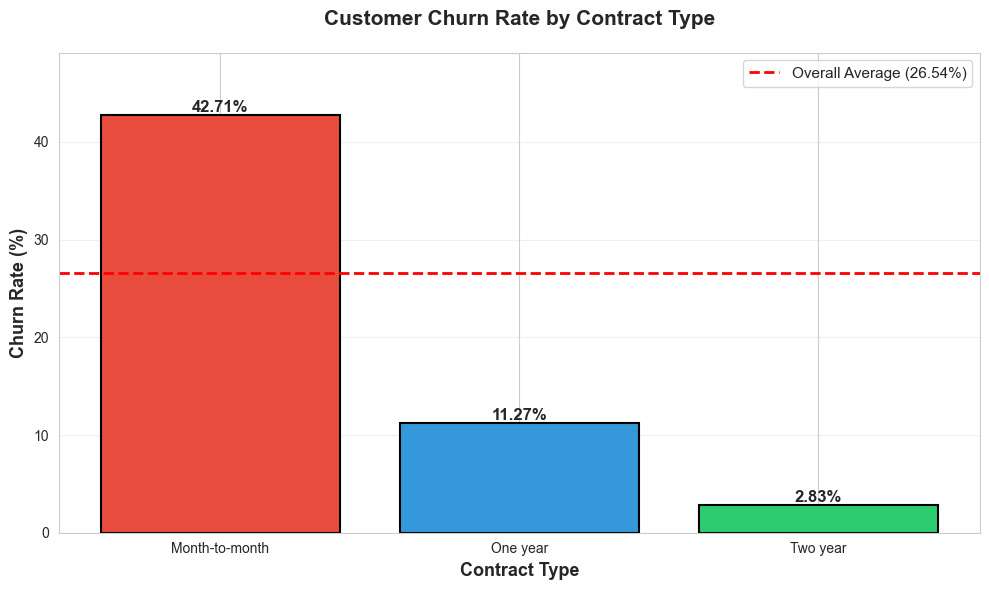

In [13]:
# Extract churn rates for plotting
churn_yes_rates = churn_rates['Yes']

# Create figure
plt.figure(figsize=(10, 6))

# Create bar chart
bars = plt.bar(
    churn_yes_rates.index, 
    churn_yes_rates.values,
    color=['#e74c3c', '#3498db', '#2ecc71'],  # Red, Blue, Green
    edgecolor='black',
    linewidth=1.5
)

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height,
        f'{height:.2f}%',
        ha='center', 
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

# Add horizontal line for overall average
plt.axhline(y=overall_churn_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Average ({overall_churn_rate:.2f}%)')

# Labels and formatting
plt.xlabel('Contract Type', fontsize=13, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=13, fontweight='bold')
plt.title('Customer Churn Rate by Contract Type', fontsize=15, fontweight='bold', pad=20)
plt.ylim(0, max(churn_yes_rates.values) * 1.15)  # Add space for labels
plt.legend(loc='upper right', fontsize=11)
plt.grid(axis='y', alpha=0.3)

# Tight layout
plt.tight_layout()

# Save figure
plt.savefig('churn_rate_by_contract.png', dpi=300, bbox_inches='tight')
print("Bar chart saved as 'churn_rate_by_contract.png'")

# Display
plt.show()

## Section 8: Visualization 2 - Contingency Table Heatmap

**Objective:** Visualize the underlying data structure that drove our chi-square test results, showing the actual distribution of customers across contract types and churn outcomes.

**Visualization Plan:**
1. Convert our contingency table into a heatmap with color-coded cells
2. Use color intensity to represent the number of customers in each category (darker = more customers)
3. Annotate each cell with the exact customer count for precision
4. Apply a yellow-orange-red color scheme where red highlights high concentrations
5. Label axes clearly: Contract Type (rows) and Churn Status (columns)
6. Add borders between cells for visual clarity

**Why this matters:** This heatmap provides transparency about the data behind our statistical test. Stakeholders can see not just percentages, but the actual number of customers in each category. The stark visual contrast—1,655 month-to-month customers churned (bright red) versus only 48 two-year customers churned (pale yellow)—powerfully illustrates why the chi-square test was so significant. It also shows we have sufficient sample sizes in all categories, validating our test assumptions.


Heatmap saved as 'contingency_table_heatmap.png'


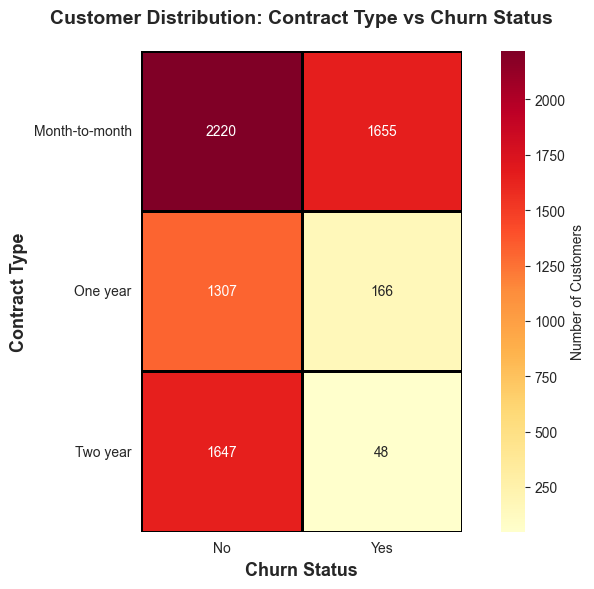

In [14]:
# Create figure
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(
    contingency_table,
    annot=True,           # Show numbers in cells
    fmt='d',              # Format as integers
    cmap='YlOrRd',        # Yellow-Orange-Red color scheme
    cbar_kws={'label': 'Number of Customers'},
    linewidths=2,         # Lines between cells
    linecolor='black',
    square=True           # Make cells square
)

# Labels and formatting
plt.xlabel('Churn Status', fontsize=13, fontweight='bold')
plt.ylabel('Contract Type', fontsize=13, fontweight='bold')
plt.title('Customer Distribution: Contract Type vs Churn Status', fontsize=14, fontweight='bold', pad=20)

# Rotate labels for better readability
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Tight layout
plt.tight_layout()

# Save figure
plt.savefig('contingency_table_heatmap.png', dpi=300, bbox_inches='tight')
print("Heatmap saved as 'contingency_table_heatmap.png'")

# Display
plt.show()

# SECTION 9: RESULTS SUMMARY AND CONCLUSIONS

## Key Findings

This analysis examined 7,043 telecommunications customers to determine whether contract type influences customer churn rates. The dataset contained three contract categories: month-to-month, one-year, and two-yea, with an overall churn rate of 26.54%.

The exploratory analysis revealed differences in churn behavior across contract types. Month-to-month customers churned at a rate of 42.71%, which stands 16.17 percentage points above the overall average. In stark contrast, one-year contract customers churned at just 11.27%, and two-year contract customers showed the lowest churn rate at 2.83%. These patterns suggest that longer contract commitments create substantial barriers to customer departure.

The chi-square test of independence confirmed these differences are statistically significant. The test produced a chi-square statistic of 1184.60 with a p-value equal to zero, far below the significance threshold of 0.05. This means we can reject the null hypothesis with high confidence and the observed relationship between contract type and churn do not occur by chance.

Beyond statistical significance, the analysis also demonstrated practical significance. Cramér's V measured 0.41, indicating there is a moderate effect size. This tells us the relationship isn't just statistically detectable but it's a strong enough relationship to make business decisions from it.

The contingency table heatmap visualizes the stark contrast in customer distribution. Month-to-month contracts show 1,655 churned customers compared to only 48 churned customers on two-year contracts. This visual evidence reinforces the statistical findings and makes the pattern immediately clear to non-technical stakeholders.

## Conclusion

**Contract type significantly influences customer churn rates in telecommunications.** Customers on month-to-month contracts churn at rates more than 15 times higher than customers on two-year contracts (42.71% vs. 2.83%). This relationship is both statistically significant (p < 0.05) and practically meaningful (Cramér's V = 0.41), providing strong evidence that contract length functions as a critical retention mechanism.

The findings directly support the alternative hypothesis: contract type and churn are not independent variables. Longer contract commitments dramatically reduce churn likelihood.

**Business Implication:** Telecommunications companies should strategically incentivize customers to adopt longer-term contracts through pricing discounts, enhanced benefits, or promotional offers. The analysis demonstrates that converting month-to-month customers to annual or multi-year contracts could substantially reduce churn and improve customer lifetime value. Given that month-to-month customers represent 55% of the customer base and churn at 42.71%, this segment represents the highest-priority target for retention interventions.

---

**Statistical Summary:**
- Chi-square statistic: χ² = 1184.60
- p-value: < 0.0001
- Degrees of freedom: 2
- Effect size (Cramér's V): 0.41 (Moderate effect)
- Decision: Reject H₀
- Conclusion: Contract type significantly affects churn rates